In [1]:
import numpy as np 
import matplotlib.pyplot as plt

# Part 0 - A useful skill for some kernel calculation 
It might be very slow if you use explicit loops. Please observe below operations if you would:

In [2]:
a = np.random.random(3)
print(a.shape)

(3,)


In [3]:
b = np.random.random(5)
print(b.shape)

(5,)


I want to calculate $a_i$ - $b_j$ for any ($i$,$j$) = 15 values

In [4]:
# do NOT do
res1 = np.zeros([3,5])
for i, aa in enumerate(a):
    for j, bb in enumerate(b):
        res1[i,j] = aa-bb

In [5]:
# BETTER do
res2 = a[:,None] - b[None,:]
res2 == res1

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [6]:
# How?? Observe:
print(a[:,None].shape)
print(b[None,:].shape)
print((a[:,None] - b[None,:]).shape)

# this is just something that numpy and pytorch allow us to do

(3, 1)
(1, 5)
(3, 5)


# Part 1 - Linearly separable data

In [7]:
N_SAMPLE = 50
N_DATA = N_SAMPLE*2

np.random.seed(333)
data_0 = np.random.multivariate_normal(np.array([1,1]),np.array([[1,0.5],[0.5,1]]), size = N_SAMPLE)
data_1 = np.random.multivariate_normal(np.array([-5,-3]),np.array([[1,0.5],[0.5,1]]), size = N_SAMPLE)[:,[1,0]]

data = np.vstack([data_0, data_1])
label = np.array([-1]*N_SAMPLE + [1]*N_SAMPLE)

order = np.arange(N_DATA)
np.random.shuffle(order) 
data = data[order]
label = label[order]

print(data.shape, label.shape)

(100, 2) (100,)


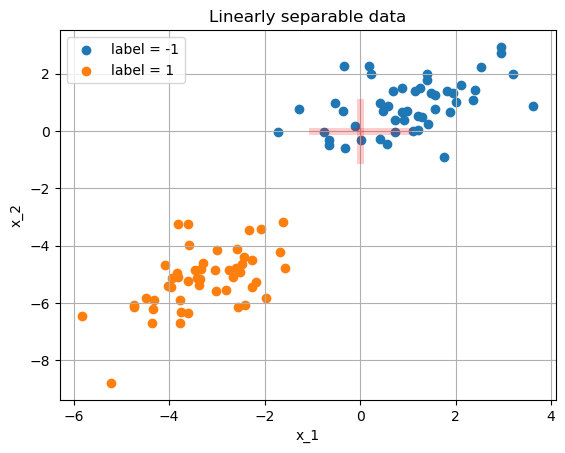

In [8]:
def plot_data(data_0, data_1, title):
    plt.plot(np.zeros([10]), np.linspace(-1,1,10), linewidth=5, c = 'red', alpha = 0.2)
    plt.plot(np.linspace(-1,1,10), np.zeros([10]), linewidth=5, c = 'red', alpha = 0.2)
    plt.scatter(*data_0.T, label = 'label = -1')
    plt.scatter(*data_1.T, label = 'label = 1')

    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.legend()
    plt.grid('on')
    plt.title(title)
    plt.show()

    return
plot_data(data_0, data_1, 'Linearly separable data')

### Q1 - Solve Primal for Hard Margin

In [9]:
from scipy.optimize import minimize, LinearConstraint





### Q2 - Show decision boundary together with the data points

### Q3 - Solve Dual for Hard Margin

### Q4 - Show decision boundary together with the data points

### Q5 - Do Primal and Dual give the same hyperplane ? Show that the difference is of a very small order (e.g. smaller than 1e-8) 

# Part 2 - Linearly inseparable data 1

In [10]:
N_SAMPLE = 50
N_DATA = N_SAMPLE*2

np.random.seed(333)
data_0 = np.random.multivariate_normal(np.array([1,1]),np.array([[1,0.5],[0.5,1]]), size = N_SAMPLE)
data_1 = np.random.multivariate_normal(np.array([-2,-1]),np.array([[1,0.5],[0.5,1]]), size = N_SAMPLE)[:,[1,0]]

data = np.vstack([data_0, data_1])
label = np.array([-1]*N_SAMPLE + [1]*N_SAMPLE)

order = np.arange(N_DATA)
np.random.shuffle(order) 
data = data[order]
label = label[order]

print(data.shape, label.shape)

(100, 2) (100,)


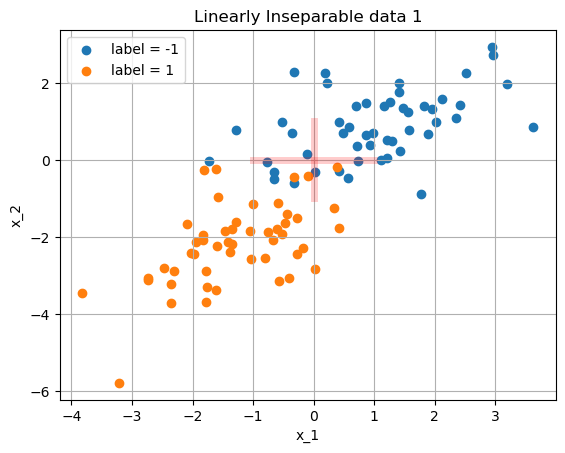

In [11]:
plot_data(data_0, data_1, 'Linearly Inseparable data 1')

### Q6 - Does Hard Margin Primal solution still work? Show decision boundary together with the data points

### Q7 - Does Hard Margin Dual solution still work? Show decision boundary together with the data points

### Q8 - Ideas about why Primal and Dual no longer give same hyperplane

`Justification` :

### Q9 - Solve Dual for Soft Margin with your own C

### Q10 - Show decision boundary together with the data points


# Part 3 - Linearly Inseparable data 2

In [14]:
N_SAMPLE = 50
N_DATA = N_SAMPLE*2


def generate_fat_spiral_data(n_samples=100, noise=0.1, width=0.2):

    # Create spiral data
    theta = np.linspace(0, 4 * np.pi, n_samples)  # angle
    r1 = theta + np.random.randn(n_samples) * noise  # radius for class 1
    r2 = theta + np.pi + np.random.randn(n_samples) * noise  # radius for class 2

    # Class 1 (outer spiral)
    x1 = (r1 + np.random.uniform(-width, width, n_samples)) * np.cos(theta)
    y1 = (r1 + np.random.uniform(-width, width, n_samples)) * np.sin(theta)

    # Class 2 (inner spiral)
    x2 = (r2 + np.random.uniform(-width, width, n_samples)) * np.cos(theta)
    y2 = (r2 + np.random.uniform(-width, width, n_samples)) * np.sin(theta)

    # Stack the data and labels
    X = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2))))
    y = np.array([-1] * n_samples + [1] * n_samples)  # Labels: 0 for class 1, 1 for class 2

    return X, y

# Generate fat spiral data
np.random.seed(333)



data, label = generate_fat_spiral_data(n_samples=N_SAMPLE, noise=0.1, width=0.4)
print(data.shape, label.shape)
data_0 = data[label<0]
data_1 = data[label>0]


(100, 2) (100,)


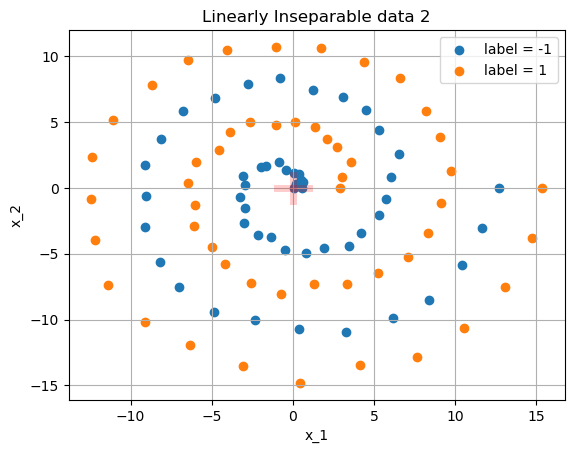

In [15]:
plot_data(data_0, data_1, 'Linearly Inseparable data 2')


### Q11 - Choose your own kernel and implement Kernel SVM (either hard or soft margin, the goal is to succeed the classification)

### Q12 - Calculate your prediction on train set. What is your fitting accuracy?

### Q13 - Try Spectral Clustering. Does it work with your SVM? You do no need to have very visible results to obtain the points.

### Q14 - Decision Boundary

### Q15 - Given the decision boundary, do you think your model performs well on the data? Will it adapt well for further generalization of data ? Justify your opinion.


`Comment`: